In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import zscore
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('housing.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df=df.drop(columns=['PoolQC','MiscFeature','Fence','Alley','Id','GarageCond','FireplaceQu'], axis=1)

In [6]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']

 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',

In [7]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  37
No of categorical features:  37


In [8]:
for col in cf:
    print(df[col].value_counts(),'\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Pave    1454
Grvl       6
Name: Street, dtype: int64 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Norm      1260
Feedr     

In [9]:
for col in nf:
    print(col,' : ',df[col].nunique())

MSSubClass  :  15
LotFrontage  :  110
LotArea  :  1073
OverallQual  :  10
OverallCond  :  9
YearBuilt  :  112
YearRemodAdd  :  61
MasVnrArea  :  327
BsmtFinSF1  :  637
BsmtFinSF2  :  144
BsmtUnfSF  :  780
TotalBsmtSF  :  721
1stFlrSF  :  753
2ndFlrSF  :  417
LowQualFinSF  :  24
GrLivArea  :  861
BsmtFullBath  :  4
BsmtHalfBath  :  3
FullBath  :  4
HalfBath  :  3
BedroomAbvGr  :  8
KitchenAbvGr  :  4
TotRmsAbvGrd  :  12
Fireplaces  :  4
GarageYrBlt  :  97
GarageCars  :  5
GarageArea  :  441
WoodDeckSF  :  274
OpenPorchSF  :  202
EnclosedPorch  :  120
3SsnPorch  :  20
ScreenPorch  :  76
PoolArea  :  8
MiscVal  :  21
MoSold  :  12
YrSold  :  5
SalePrice  :  663


In [10]:
#filling missing data for categorical data
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace = True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace = True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace = True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace = True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace = True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace = True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace = True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace = True)

In [11]:
#filling missing data with imputation for numerical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
df['LotFrontage']=imp.fit_transform(df['LotFrontage'].values.reshape(-1,1))
df['MasVnrArea']=imp.fit_transform(df['MasVnrArea'].values.reshape(-1,1))
df['GarageYrBlt']=imp.fit_transform(df['GarageYrBlt'].values.reshape(-1,1))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

For missing data i use two methods. As for categorical data i used most frequent value to b filled in missing place by fillna. And for numerical method i use imputation method filling mean value in missing place and now our data is ready for further process.

In [13]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df.describe(include = ['O'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,2,5,4,7,6,3,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Y,SBrkr,TA,Typ,Attchd,Unf,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1365,1335,735,1360,951,686,1392,1340,1267,1198


In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


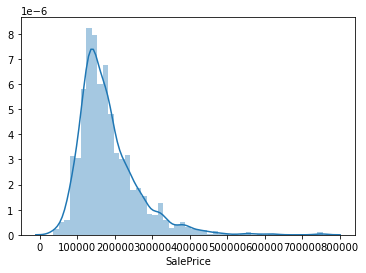

In [16]:
#univarite analysis
sns.distplot(df['SalePrice'])
plt.show()

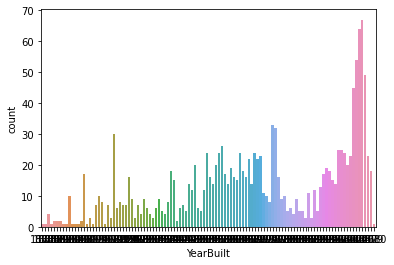

In [17]:
sns.countplot(df['YearBuilt'])
plt.show()

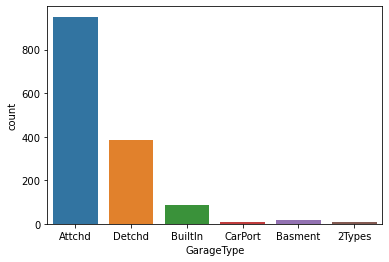

In [18]:
sns.countplot(df['GarageType'])
plt.show()

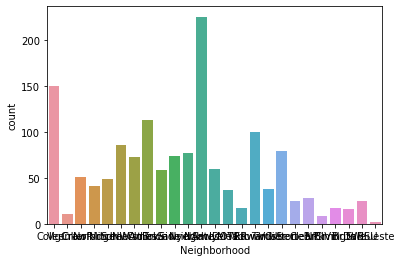

In [19]:
sns.countplot(df['Neighborhood'])
plt.show()

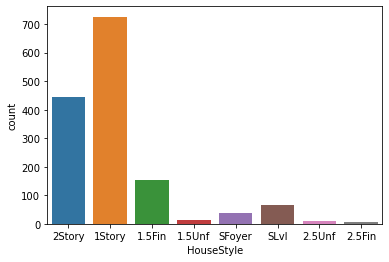

In [20]:
sns.countplot(df['HouseStyle'])
plt.show()

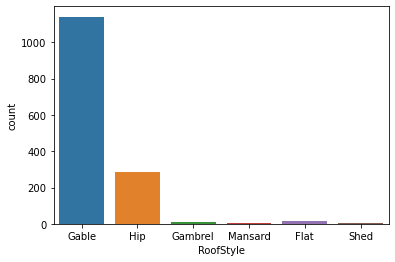

In [21]:
sns.countplot(df['RoofStyle'])
plt.show()

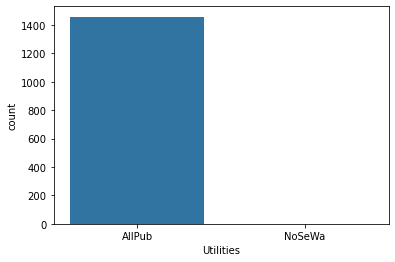

In [22]:
sns.countplot(df['Utilities'])
plt.show()

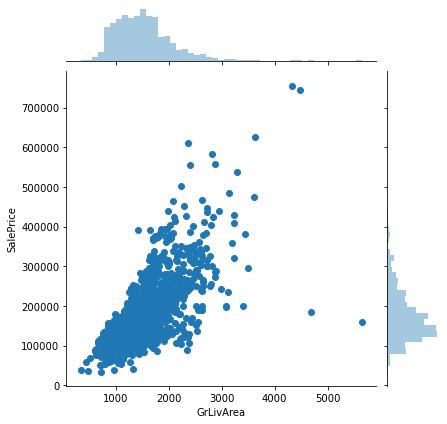

In [23]:
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.show()

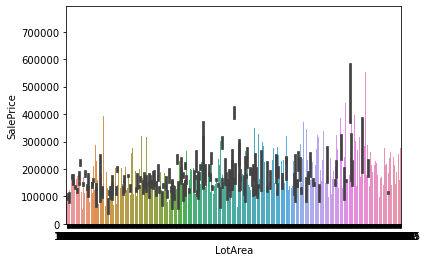

In [24]:
sns.barplot(x=df['LotArea'], y=df['SalePrice'])
plt.show()

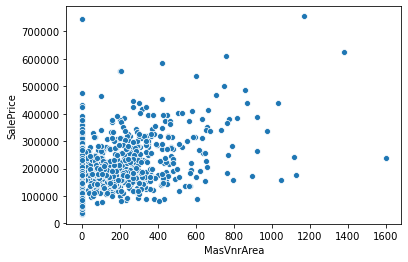

In [25]:
sns.scatterplot(x=df['MasVnrArea'], y=df['SalePrice'])
plt.show()

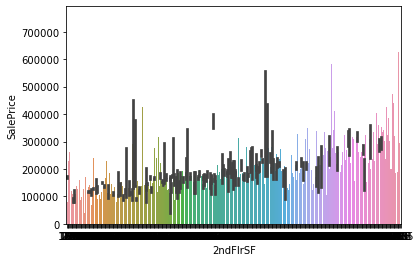

In [26]:
sns.barplot(x=df['2ndFlrSF'], y=df['SalePrice'])
plt.show()

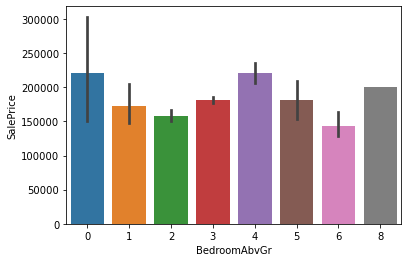

In [27]:
sns.barplot(x=df['BedroomAbvGr'], y=df['SalePrice'])
plt.show()

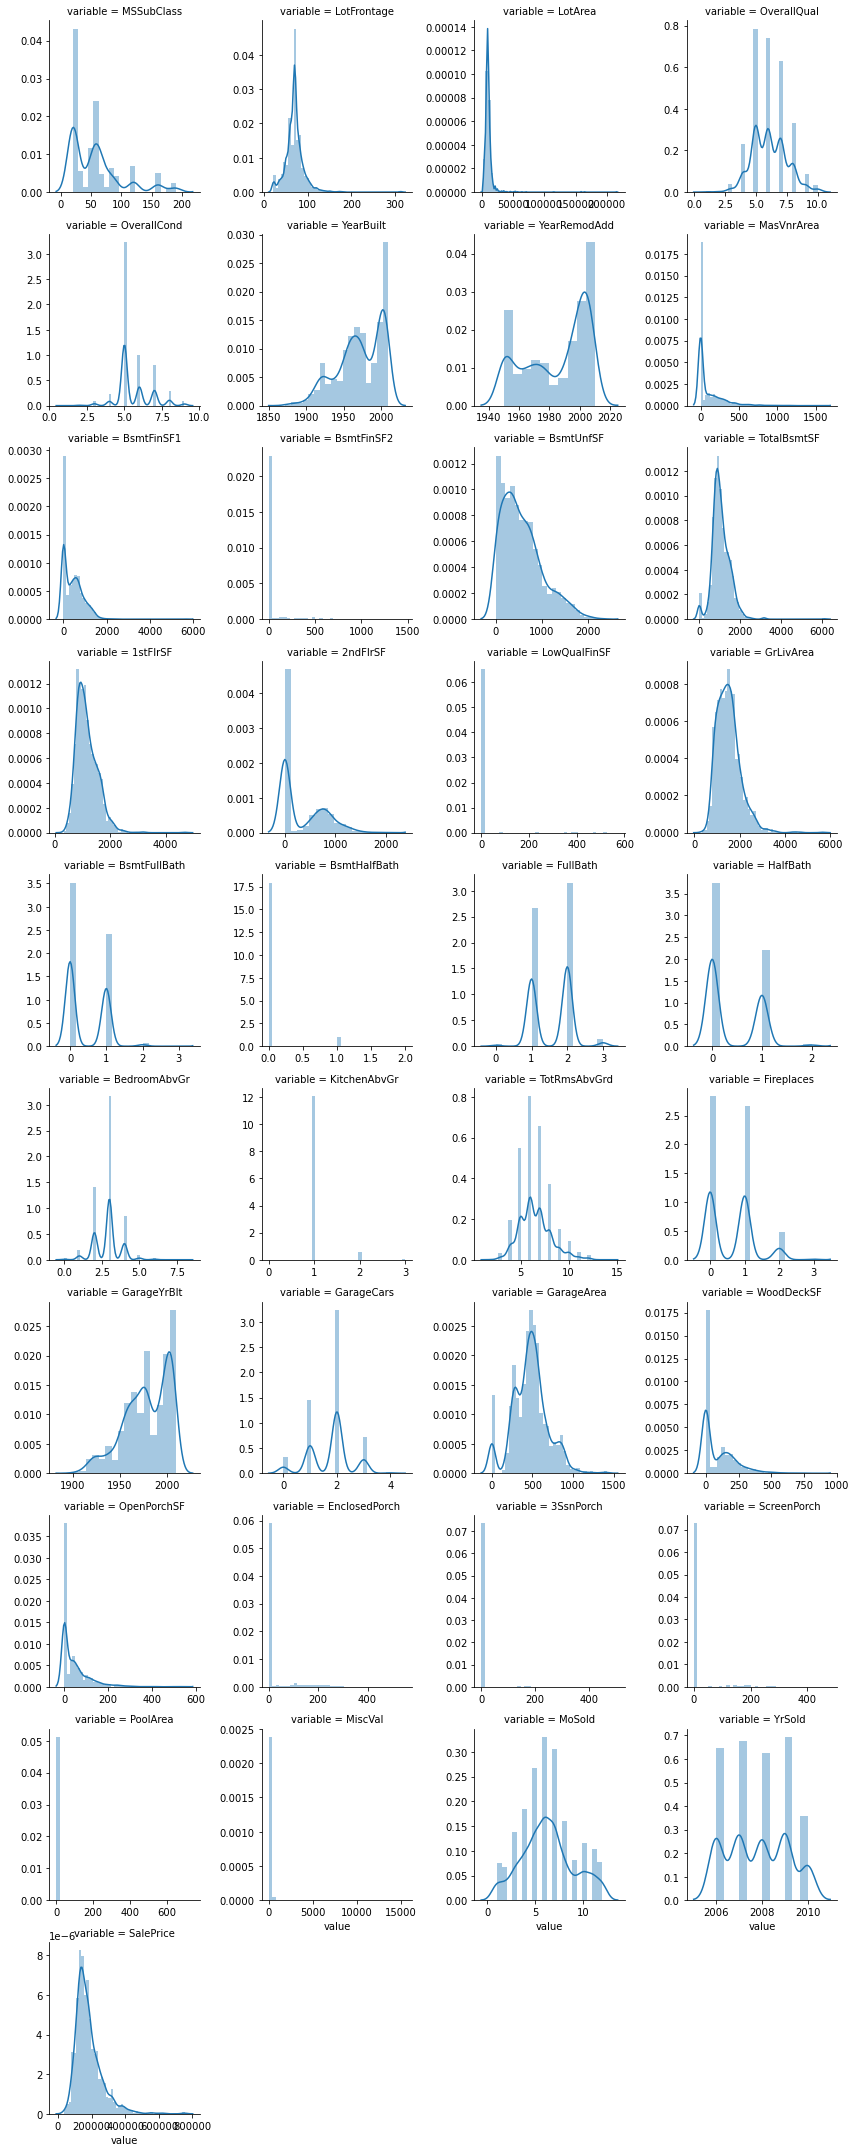

In [28]:
#create numeric plots
nd = pd.melt(df, value_vars = nf)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [29]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


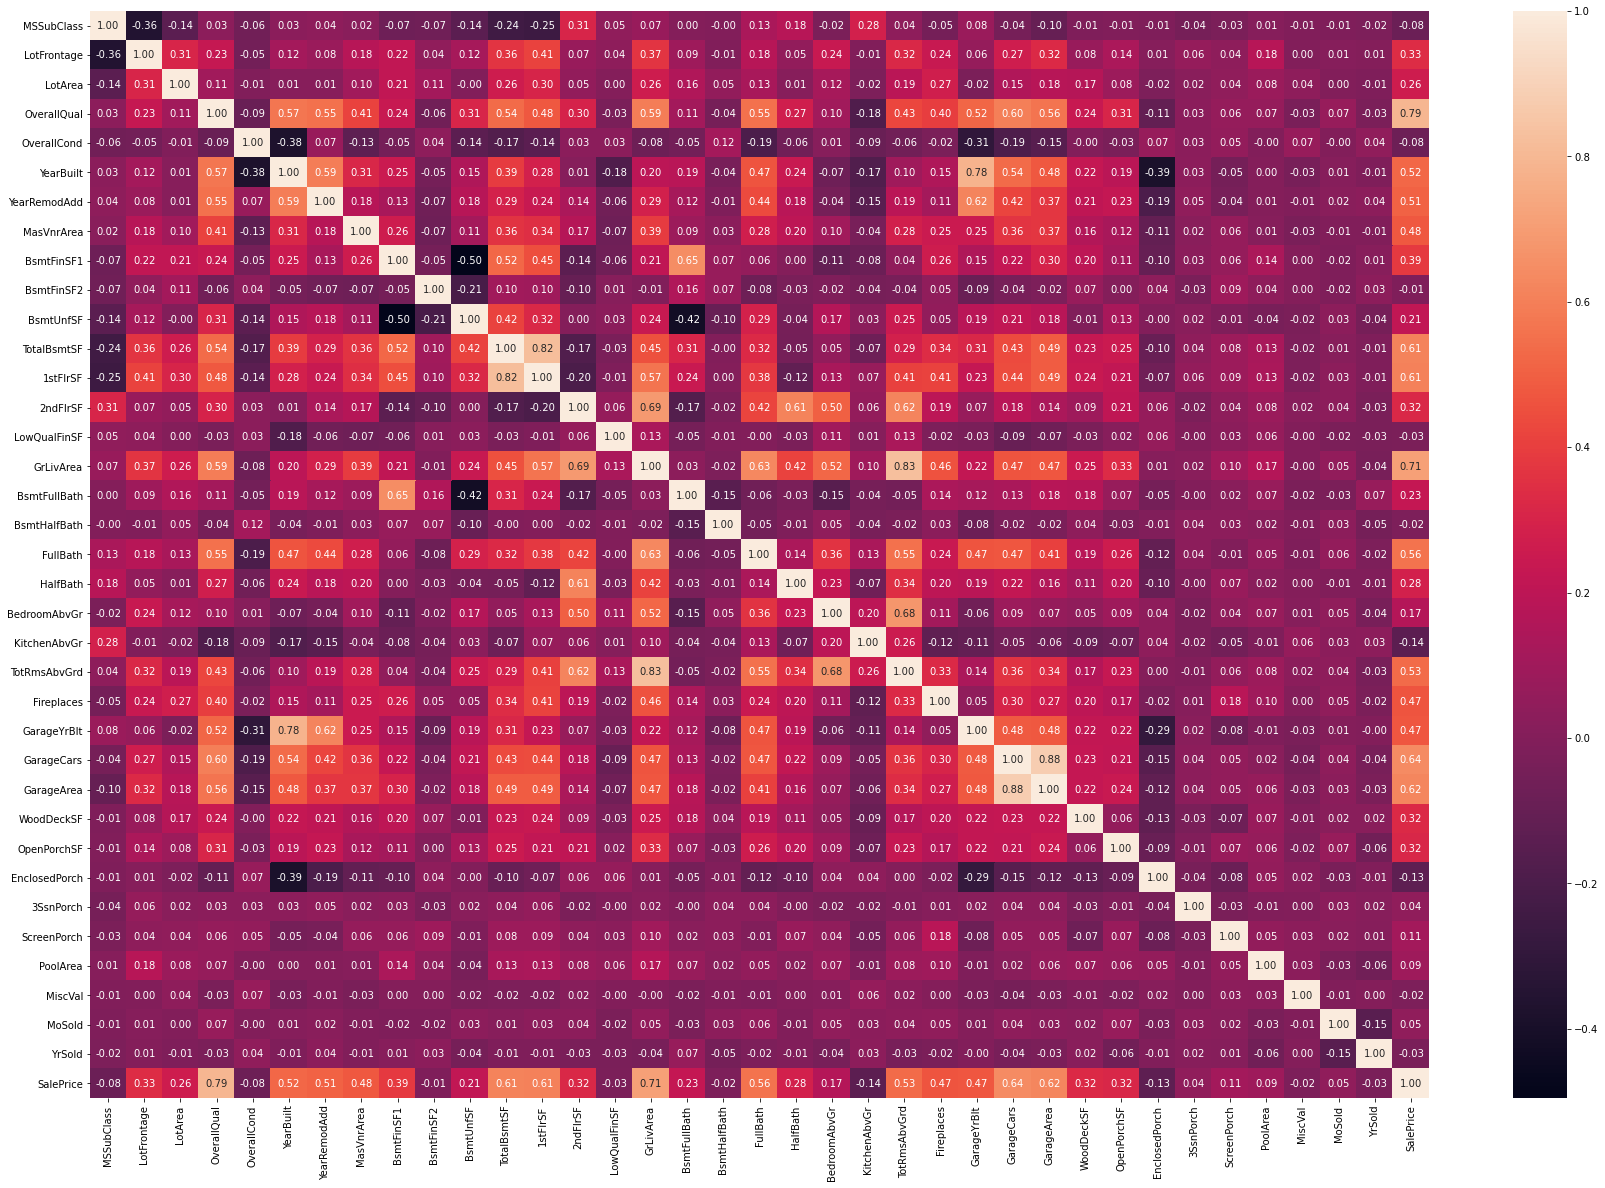

In [30]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [31]:
#Coding categorical data in numeric form
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [32]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,70.049958,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.024023,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,70.049958,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


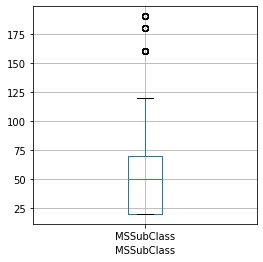

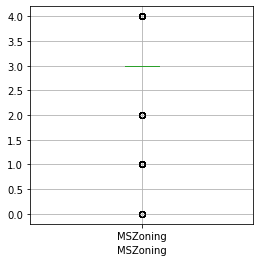

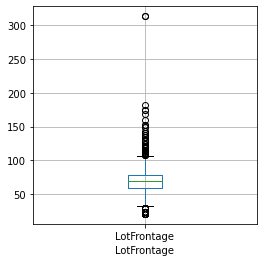

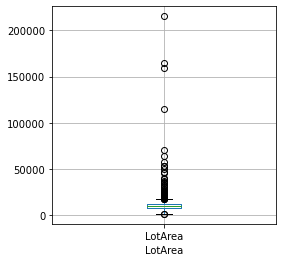

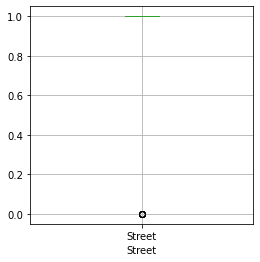

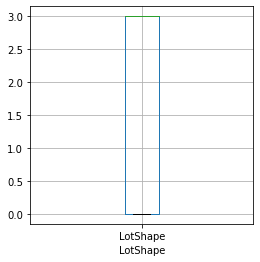

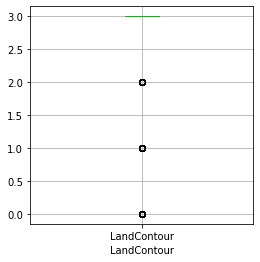

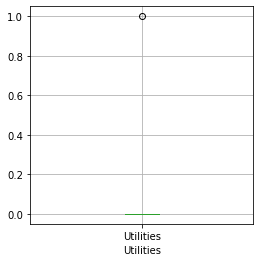

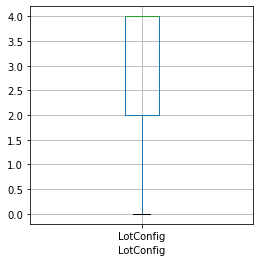

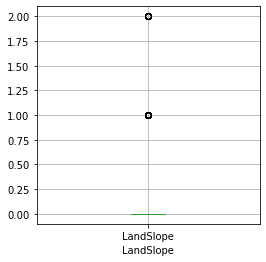

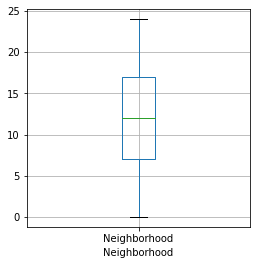

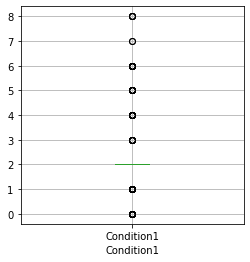

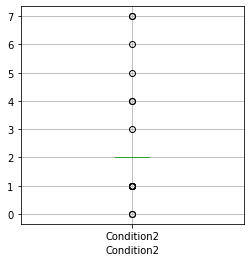

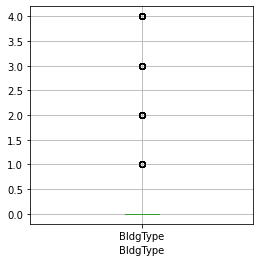

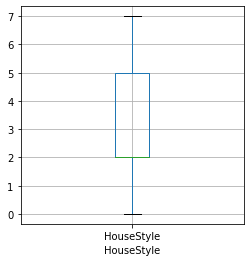

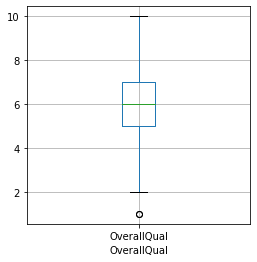

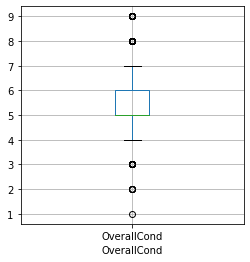

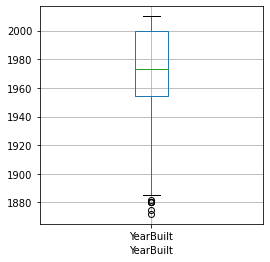

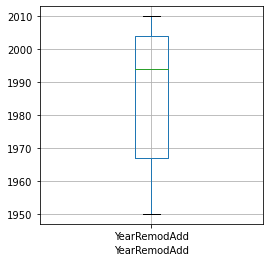

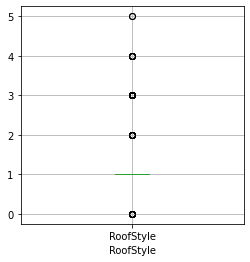

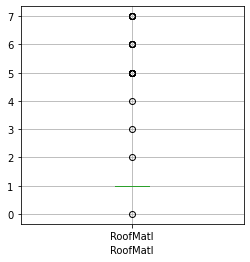

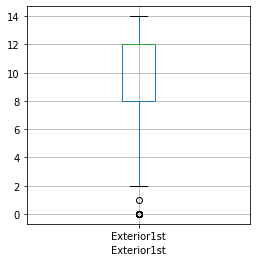

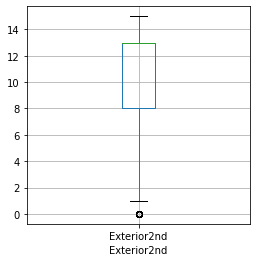

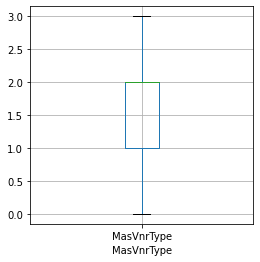

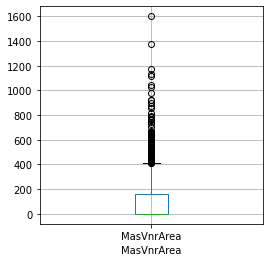

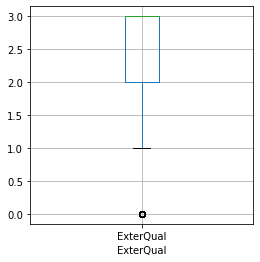

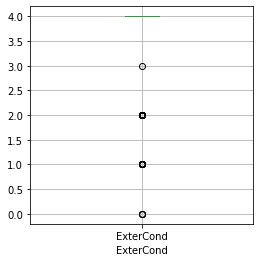

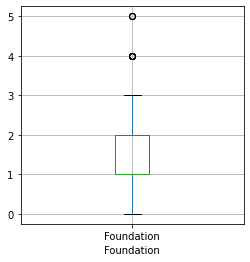

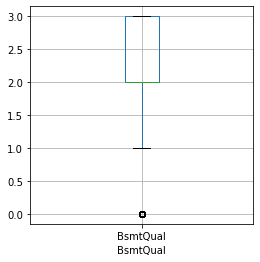

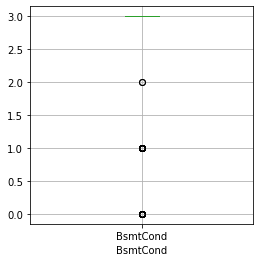

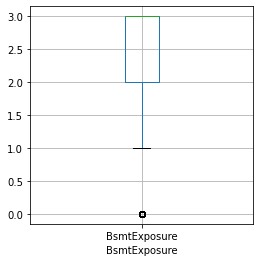

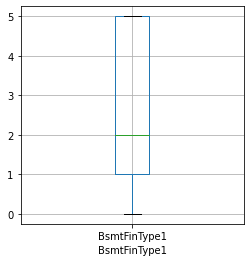

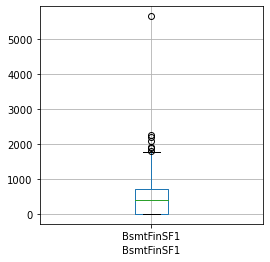

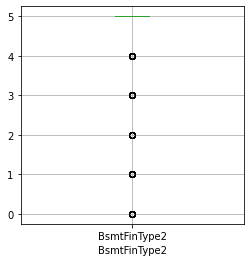

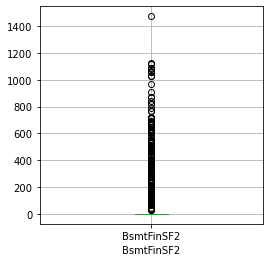

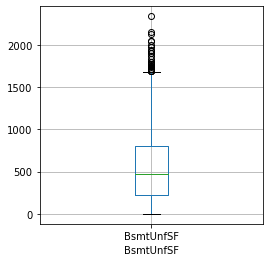

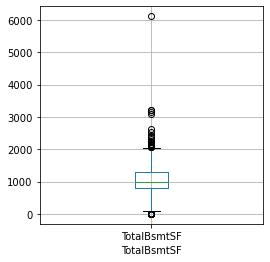

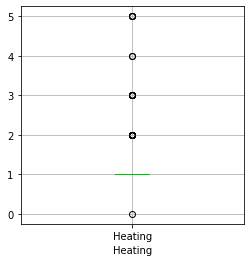

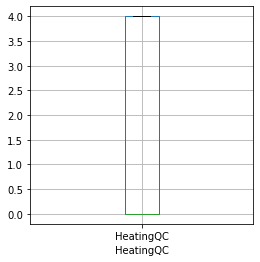

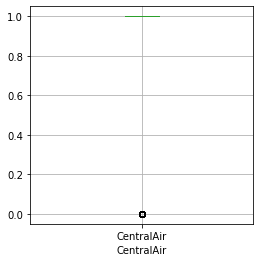

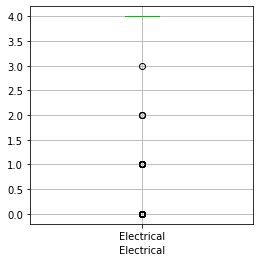

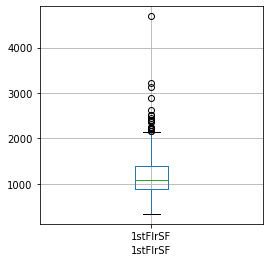

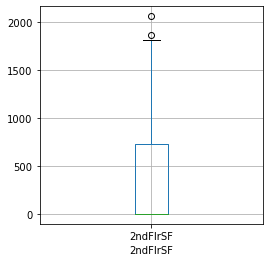

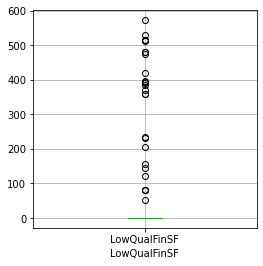

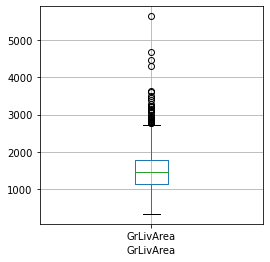

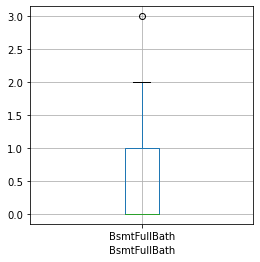

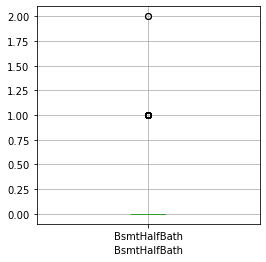

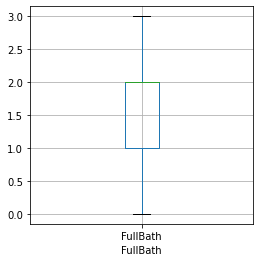

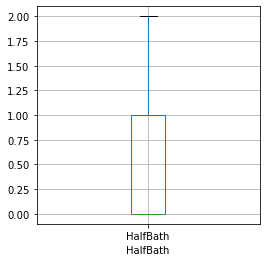

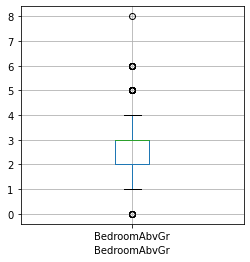

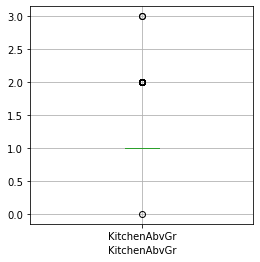

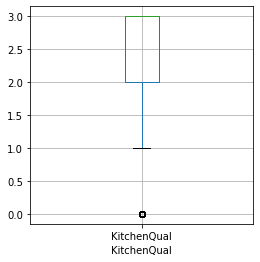

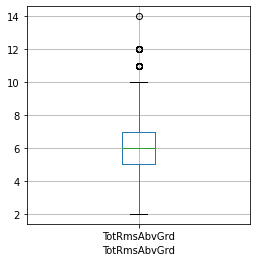

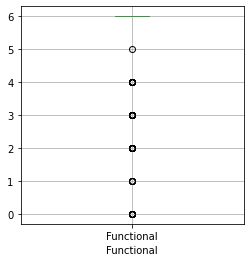

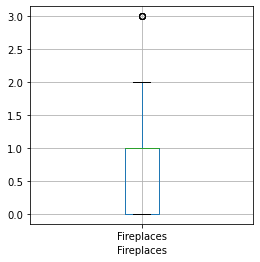

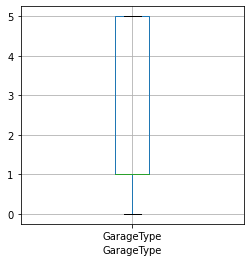

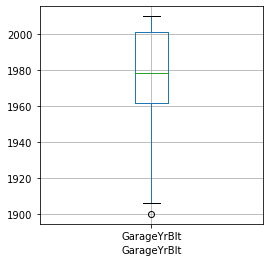

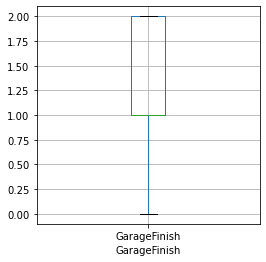

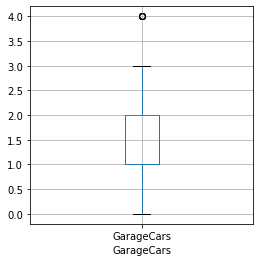

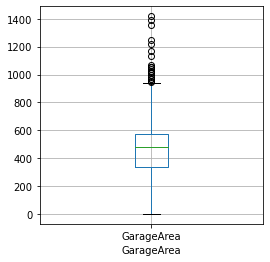

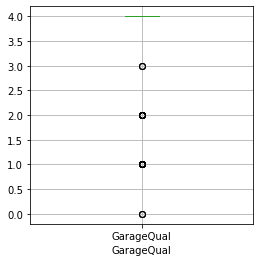

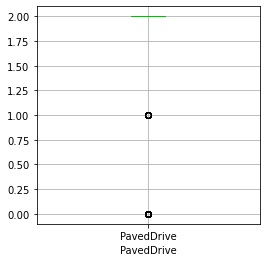

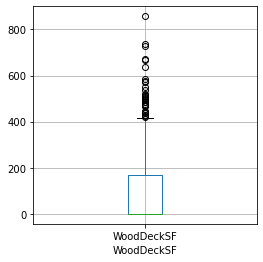

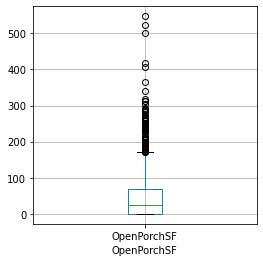

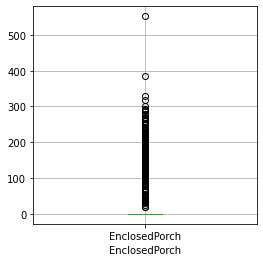

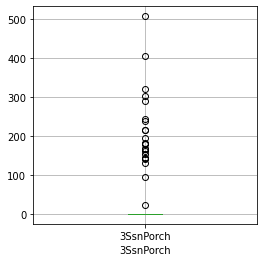

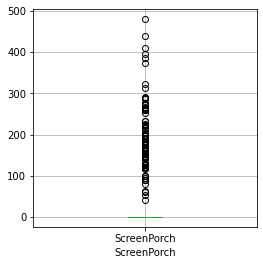

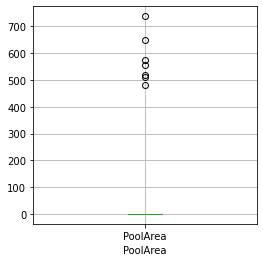

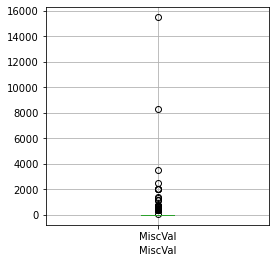

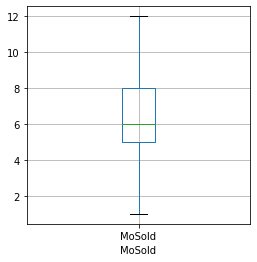

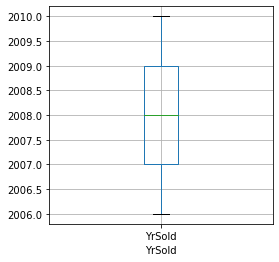

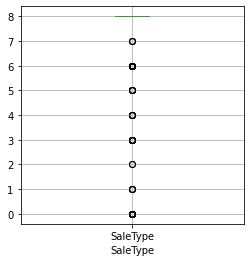

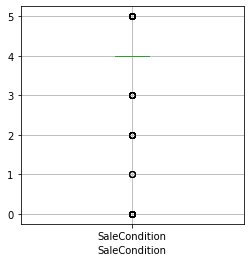

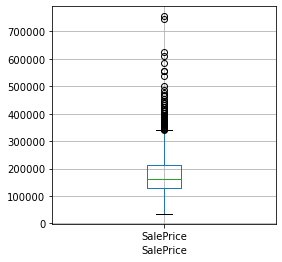

In [33]:
for i in df.columns:
        plt.figure(figsize = (4,4))
        df.boxplot(column=[i])
        plt.xlabel(i)

In [34]:
y=df.iloc[:,-1]
dfx=df.iloc[:,0:-1]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [35]:
dfx.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
dfx=pca.fit_transform(dfx)
dfx=pd.DataFrame(data=dfx)
dfx.head()

,0,1,2,3,4,5,6,7,8,9
0,-2065.542340,18.441864,-285.142256,736.134946,-165.920397,-187.729825,-63.102605,47.711291,13.705713,-108.708641
1,-912.040387,-10.366398,743.674520,225.383160,-46.595432,-78.026293,57.995117,-46.540394,-99.944628,203.603005
2,734.161212,86.814621,-472.287584,412.637402,-125.975257,-176.272759,-83.680448,62.969715,-36.445814,-110.533177
3,-970.840565,-54.415079,-581.463312,180.600355,-96.091557,9.235778,-110.957823,15.848711,-179.164253,-115.501432
4,3757.977249,638.421974,-537.929968,539.841916,-135.986418,-186.268521,-244.519686,137.207399,7.110614,30.577138


In [37]:
dfx.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.206952,0.026061,-0.486992,1.388996,-0.335703,-0.833483,-0.348763,0.274689,0.090539,-0.917323
1,-0.091379,-0.014649,1.270117,0.425270,-0.094276,-0.346421,0.320535,-0.267948,-0.660228,1.718076
2,0.073557,0.122681,-0.806617,0.778596,-0.254883,-0.782616,-0.462495,0.362537,-0.240759,-0.932719
3,-0.097271,-0.076896,-0.993077,0.340771,-0.194420,0.041005,-0.613255,0.091246,-1.183547,-0.974643
4,0.376521,0.902177,-0.918727,1.018615,-0.275138,-0.826995,-1.351442,0.789947,0.046972,0.258021


In [39]:
x.skew()

0    12.194356
1     1.265653
2    -0.011779
3    -0.456863
4    23.630143
5     2.250018
6    -0.046948
7     1.849662
8     1.511398
9     1.242384
dtype: float64

In [40]:
x.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42) 

In [42]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(978, 10) (482, 10)
(978,) (482,)


In [43]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  79  is  0.7559387430898238


In [44]:
KNR=KNeighborsRegressor(n_neighbors=5)
SV=SVR()
LR=LinearRegression()
LAR=Lasso()
RR=Ridge()
DT=DecisionTreeRegressor(random_state=fr_state)
RFR=RandomForestRegressor(random_state=fr_state)
ABR=AdaBoostRegressor(random_state=fr_state)
GBR=GradientBoostingRegressor(random_state=fr_state)

In [45]:
models = []
models.append(('KNeighborsRegressor', KNR))
models.append(('SVR', SV))
models.append(('LinearRegression', LR))
models.append(('LassoRegression', LAR))
models.append(('RidgeRegressor', RR))
models.append(('DecisionTreeRegressor', DT))
models.append(('RandomForestRegressor', RFR))
models.append(('AdaBoostRegressor', ABR))
models.append(('GradientBoostingRegressor',GBR))

In [46]:

Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y_test,y_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('\n')

*********************** KNeighborsRegressor ***********************


KNeighborsRegressor()


Cross_Val_Score =  0.654936971489361


error:
r2 score is:  0.6757848974429239


root Mean squared error:  43590.94976602254


*********************** SVR ***********************


SVR()


Cross_Val_Score =  -0.053366655816703856


error:
r2 score is:  -0.023204962370433124


root Mean squared error:  77439.23068187149


*********************** LinearRegression ***********************


LinearRegression()


Cross_Val_Score =  0.6781142803909679


error:
r2 score is:  0.7559387430898238


root Mean squared error:  37820.66255949312


*********************** LassoRegression ***********************


Lasso()


Cross_Val_Score =  0.6781195622647582


error:
r2 score is:  0.7559347054335854


root Mean squared error:  37820.97540349892


*********************** RidgeRegressor ***********************


Ridge()


Cross_Val_Score =  0.6781572749657295


error:
r2 score is:  0.755780372384263


root Me

In [47]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_error':rmse})
result

,Model,Cross_val_score,r2_score,root_mean_squared_error
0,KNeighborsRegressor,0.654937,0.675785,43590.949766
1,SVR,-0.053367,-0.023205,77439.230682
2,LinearRegression,0.678114,0.755939,37820.662559
3,LassoRegression,0.678120,0.755935,37820.975403
4,RidgeRegressor,0.678157,0.755780,37832.931434
5,DecisionTreeRegressor,0.441240,0.647338,45463.118358
6,RandomForestRegressor,0.733274,0.790828,35013.174343
7,AdaBoostRegressor,0.630454,0.676834,43520.345923
8,GradientBoostingRegressor,0.712442,0.800572,34187.937976


In [48]:
parameter = {'bootstrap': [True, False],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [10,20,30]}

In [49]:
grid = GridSearchCV( estimator=RFR, param_grid = parameter)
grid.fit(x, y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)


GridSearchCV(estimator=RandomForestRegressor(random_state=79),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})
0.7415454105970047
RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=30, random_state=79)
{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}


In [50]:
parameter1= { 'max_features': ['auto', 'sqrt'],
               'learning_rate':[0.1,0.05,0.01],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [10,20,30]}

In [51]:
grid = GridSearchCV( estimator=GBR, param_grid = parameter1)
grid.fit(x, y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)


GridSearchCV(estimator=GradientBoostingRegressor(random_state=79),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})
0.7045632176816488
GradientBoostingRegressor(max_features='auto', min_samples_leaf=4,
                          n_estimators=30, random_state=79)
{'learning_rate': 0.1, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}


In [52]:
RFR=RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=30, random_state=79)

GBR=GradientBoostingRegressor(max_features='auto', min_samples_leaf=4,
                          n_estimators=30, random_state=79)

In [53]:
models = []
models.append(('RandomForestRegressor', RFR))
models.append(('GradientBoostingRegressor',GBR))

In [54]:

Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y_test,y_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('\n')

*********************** RandomForestRegressor ***********************


RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=30, random_state=79)


Cross_Val_Score =  0.7307459588614815


error:
r2 score is:  0.7917499675204485


root Mean squared error:  34935.92526538331


*********************** GradientBoostingRegressor ***********************


GradientBoostingRegressor(max_features='auto', min_samples_leaf=4,
                          n_estimators=30, random_state=79)


Cross_Val_Score =  0.6967939355303377


error:
r2 score is:  0.7628031668187789


root Mean squared error:  37285.00058132616




In [55]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_error':rmse})
result

,Model,Cross_val_score,r2_score,root_mean_squared_error
0,RandomForestRegressor,0.730746,0.791750,34935.925265
1,GradientBoostingRegressor,0.696794,0.762803,37285.000581


In [56]:
 import joblib

In [57]:
joblib.dump(RFR,'housing.pkl')

['housing.pkl']

In [58]:
model=joblib.load('housing.pkl')

In [59]:
model.predict(x_test.head())

array([159426.94444444, 223133.82222222, 185100.34722222, 138295.69444444,
       123936.38055556])